# Import needed packages

In [1]:
import numpy as np
from scipy.sparse.linalg import expm_multiply
import matplotlib.pyplot as plt

plt.style.use('seaborn-talk')
plt.rcParams.update({'figure.dpi': 120,'figure.figsize': (6,4)})     

from pyQME.spectral_density import SpectralDensity
from pyQME.linear_spectra import SecularSpectraCalculator
from pyQME.tensors.markov import RedfieldTensor
from pyQME.utils import overdamped_brownian,underdamped_brownian,get_timeaxis

# Define the system

**Hamiltonian (1/cm)**

In [2]:
nchrom = 2 #numero di cromofori

coupling = 100
E0 = 10000
energy_gap = 478
H = np.zeros((nchrom,nchrom)) #hamiltonian

H[0] = np.asarray([E0      ,coupling     ])
H[1] = np.asarray([coupling,E0+energy_gap])

In [3]:
H

array([[10000.,   100.],
       [  100., 10478.]])

**Transition dipoles (Debye)**

In [4]:
dipoles = np.ones([nchrom,3])

**Temperature (Kelvin)**

In [5]:
temp = 298

**Spectral density**

In [6]:
freq_axis_SD = np.arange(0.1,4000,0.1)

In [7]:
SD_data = overdamped_brownian(freq_axis_SD,30,37)
SD_data = SD_data + underdamped_brownian(freq_axis_SD,5,50,518)

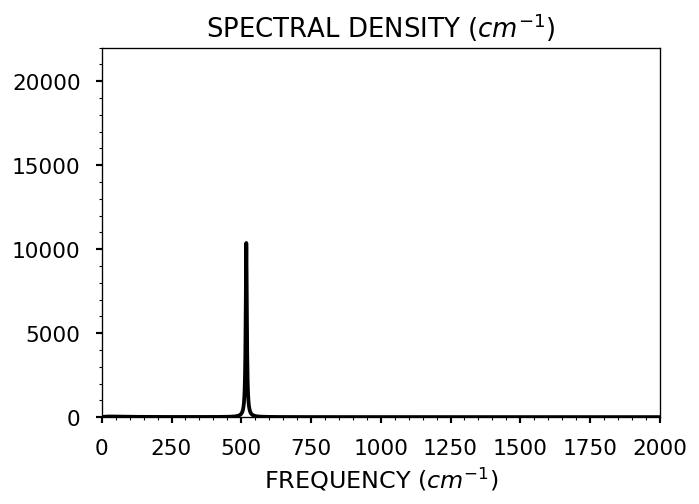

In [8]:
plt.plot(freq_axis_SD,SD_data,color='black');
plt.xlim(0,2000);
plt.ylim(0,22000)
plt.title('SPECTRAL DENSITY ($cm^{-1}$)');
plt.xlabel('FREQUENCY ($cm^{-1}$)');
plt.minorticks_on()

In [9]:
SD_obj = SpectralDensity(freq_axis_SD,SD_data,temperature=temp)

**Time axis (cm)**

In [10]:
energies = np.diag(H)
time_axis = get_timeaxis(SD_obj.Reorg,energies,5)
SD_obj.time = time_axis

**Relaxation Tensor (Complex Redfield)**

In [11]:
rel_tens_obj = RedfieldTensor(H,SD_obj)

# Spectrum calculation

In [12]:
spectrum_obj = SecularSpectraCalculator(rel_tens_obj,approximation = 'no xi')

In [13]:
freq_axis_OD,OD = spectrum_obj.calc_abs_OD(dipoles=dipoles)   #to be saved

# Check the results

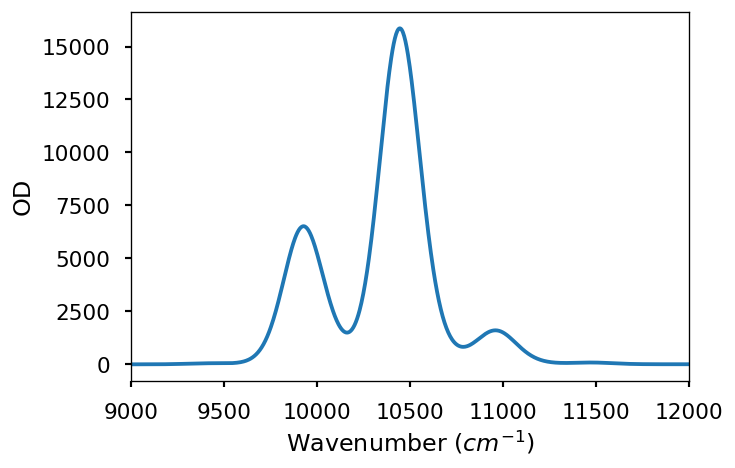

In [14]:
plt.plot(freq_axis_OD,OD)
plt.xlim(9000,12000)
plt.xlabel('Wavenumber ($cm^{-1}$)');
plt.ylabel('OD');